### Imports

# Description:
This is the first assignment we had using the Gaia Catalog. In this assignment, we used the Gaia DR2 Catalog and specified parameters to get data on a bunch of stars. 

Below are the parameters we used to gather stars from the entire night sky:
    - A distance less than 50 parsecs
    - A parallax single-to-noise ratio (S/N) greater than 10
    - A S/N greater than 5 in each photometric band (BP, RP, G)
    - An extinction (AG) less than 0.1 mag

Below are the outputs we wanted for each star that fit the above parameters:
    - Source ID
    - Right Ascension
    - Declination 
    - Parallax
    - Parallax Error
    - Mean G Magnitude
    - BP-RP Color
    - Effective Temperature
    - Luminosity

After finding the data using the Gaia Website, I downloaded it as a csv file to use in my code.


In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

from astropy import units as u
from astropy import constants as c

from astroquery.gaia import Gaia

from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia

### Submitting your query

In [58]:
#### GAIA ARCHIVE WEBSITE ####

query_result = pd.read_csv('gaia_dr2_result.csv')


### Examining your data

In [59]:
query_result

,source_id,ra,dec,parallax,parallax_error,phot_g_mean_mag,bp_rp,teff_val,lum_val
0,6790995477169966848,320.460572,-26.221887,23.916346,0.059848,12.262900,2.052661,4029.0000,NaN
1,4415215217669031680,229.238223,-1.258608,21.651875,0.042970,14.166832,2.216067,4090.5176,NaN
2,6350283492745097728,355.984772,-82.508895,25.065893,0.026521,7.526386,0.791476,5890.2500,1.149332
3,6350264560529125248,358.934175,-82.598396,38.310702,0.049651,13.576039,2.850444,3684.7650,NaN
4,4154791250114009472,279.038968,-10.891548,28.605198,0.055018,8.330505,0.890158,5540.0000,0.431254
...,...,...,...,...,...,...,...,...,...
6685,3239548665775613056,73.983450,4.669605,27.744111,0.041548,6.872698,0.726541,6068.0000,1.700833
6686,3239594295507919488,73.455654,4.894998,30.260269,0.044709,14.100830,2.707630,3776.3200,NaN
6687,2444725728828338304,0.831112,-4.567607,21.609873,0.072837,14.114411,2.602921,3678.6200,NaN
6688,2444686180769411840,0.242600,-4.933282,22.071722,0.080841,8.406075,0.838324,5713.0000,0.666158


In [60]:
# This creates a new data frame containing only those stars with valid luminosity values

query_result_filtered = query_result.dropna(subset=['lum_val'])
query_result_filtered

,source_id,ra,dec,parallax,parallax_error,phot_g_mean_mag,bp_rp,teff_val,lum_val
2,6350283492745097728,355.984772,-82.508895,25.065893,0.026521,7.526386,0.791476,5890.2500,1.149332
4,4154791250114009472,279.038968,-10.891548,28.605198,0.055018,8.330505,0.890158,5540.0000,0.431254
5,5519593520133411584,122.789559,-46.297448,24.865354,0.032165,8.584497,1.032911,5199.0000,0.471656
10,853819947756949120,157.655218,55.980398,77.434645,0.167988,4.637458,0.697404,6183.3335,1.705506
14,77161217776670208,32.717508,13.682968,23.315291,0.060883,8.015975,0.833550,5709.0000,0.855321
...,...,...,...,...,...,...,...,...,...
6680,5114240352186781952,55.774785,-12.894209,35.218015,0.062085,10.269168,1.705475,4171.8467,0.070418
6682,4464207428577214464,243.327612,13.526227,41.259192,0.035166,7.247616,0.942830,5462.6665,0.566429
6683,4464207428579939840,243.327666,13.525093,41.151008,0.041274,7.166324,0.924380,5449.7500,0.614549
6685,3239548665775613056,73.983450,4.669605,27.744111,0.041548,6.872698,0.726541,6068.0000,1.700833



### Plotting the Data - HR Diagram

In [61]:
luminosities = query_result_filtered['lum_val']
temperatures = query_result_filtered['teff_val']

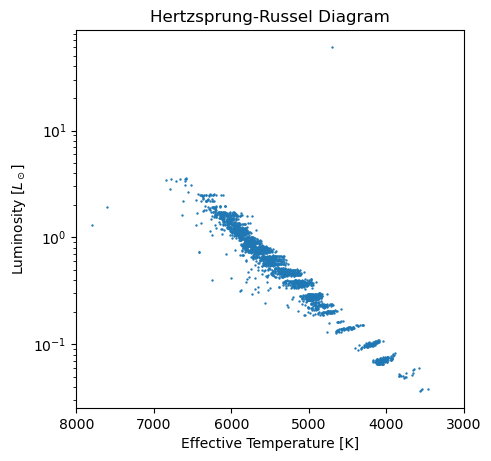

In [62]:
fig, ax = plt.subplots(figsize=(5,5), dpi=100)

ax.scatter(temperatures,luminosities, s=0.5)

ax.set_xlim(8000,3000)

ax.set_yscale('log')

ax.set_ylabel(r'Luminosity [$L_\odot$]')
ax.set_xlabel('Effective Temperature [K]')

ax.set_title('Hertzsprung-Russel Diagram')

plt.show()


### Plotting the Data - Color Magnitude Diagram

In [63]:
g_mag = query_result_filtered['phot_g_mean_mag']
bp_rp_color = query_result_filtered['bp_rp']

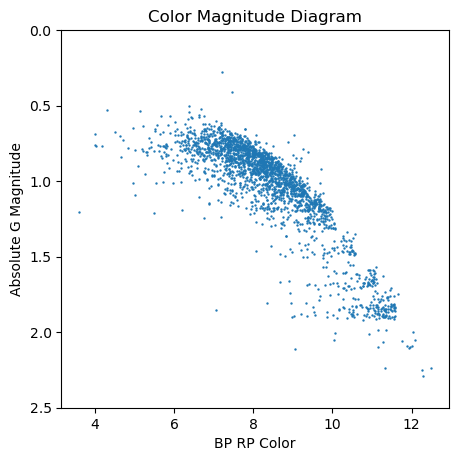

In [64]:
fig, ax = plt.subplots(figsize=(5,5), dpi=100)

ax.scatter(g_mag,bp_rp_color, s=0.5)

ax.set_ylim(2.5, 0, 0.25)

ax.set_ylabel(r'Absolute G Magnitude')
ax.set_xlabel('BP RP Color')

ax.set_title('Color Magnitude Diagram')

plt.show()